## Steps that will be performed

* Data exploration
    * skewness -- handling skewness
        * using power transformation
    * missing values
    * plot graphs to show analysis on data
* feature selection
* train test split -- using stratify to balance the class
* build some models without handling class imbalance
    * Logistic
    * KNN
    * SVM
    * Decision Tree
    * Random Forest
    * XGBoost
* perform hyper parameter tuning and get the best of each model
    * Grid search CV
* compare confusion matrix for these models
    * we will see that accuracy is always high but precision and recall are not good -- this is because of the class imbalance
* Handling class imbalance
    * Under sampling
    * Random Over sampling
    * SMOTE (Synthetic Minority Over-Sampling Technique)
    * ADASYN (ADAptive SYNthetic sampling technique)
        * *using imblearn library for sampling techniques*
* Build models after class balance
* Perform Hyper parameter tuning and get the best of each model 
* Execute the final model and show the model results


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import time

If importing the data from kaggle, one can use the below cell to attach kaggle datasets

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# data_path = '/kaggle/input/creditcardfraud/creditcard.csv'

Data file 'creditcard.csv' is located in the same folder as of this notebook. Assuming the same goes for the one who's running this notebook

In [4]:
# df = pd.read_csv(data_path)
df = pd.read_csv('creditcard.csv')

In [5]:
# creating a copy of the data set
df_bck = df.copy(deep=True)

#### Basic data visualization


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# checking class values
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Target classes are highly imbalance

In [11]:
df.shape

(284807, 31)

We have 31 variables and 284807 rows

In [12]:
# checking for null values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Handling Missing values
### We can see there are no missing values

## Feature selection

### we can see all columns are PCA columns.... and so all PCA columns will be required..

### Time column is describing when the transaction has happened. This will not give any inferences for fraud detection as frauds can happen at any point of time

In [13]:
# dropping time column

df.drop('Time', axis=1, inplace=True)

In [14]:
cols = df.columns.to_list()
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

## Data Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
corr = df.corr()

corr_target = df.corrwith(df.Class)

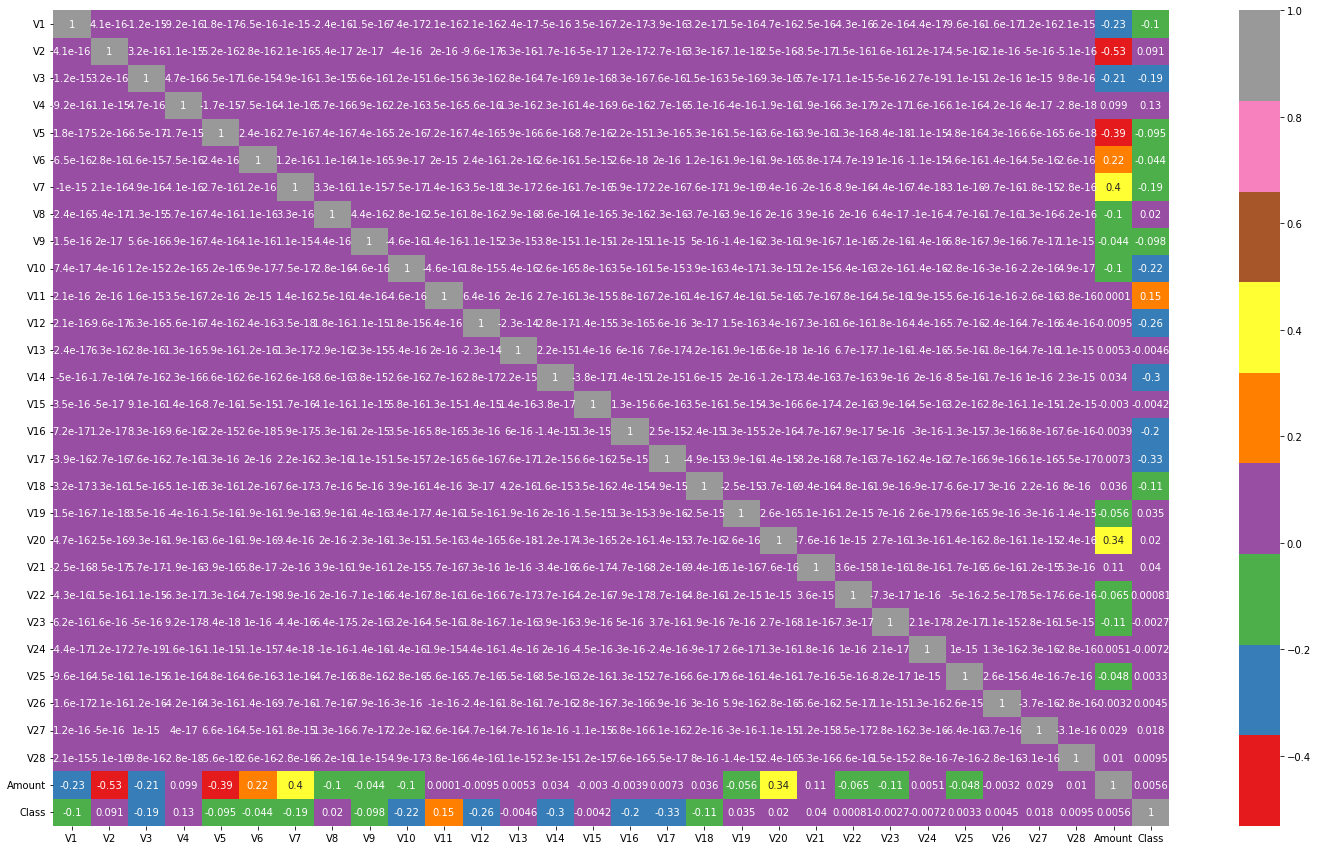

In [17]:
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True, cmap='Set1')
plt.show()

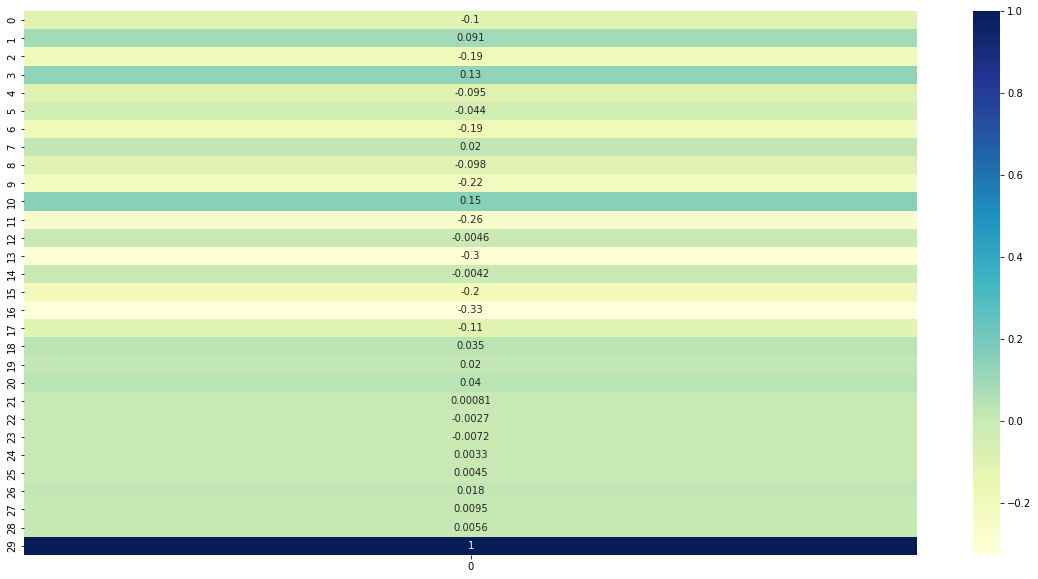

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(np.asarray(corr_target).reshape(len(cols),1), cmap="YlGnBu", annot = True)
plt.show()

#### Since the data is already PCA transformed, we can not get any more inference from the data. And no more visualization is required

## Splitting X and y

In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

In [20]:
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


In [21]:
X_cols = [col for col in cols if col != 'Class']
X_cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

### Creating some preprocess functions

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [23]:
# power transformer to handle skewness of the data
# this will transform data such that the data becomes more gaussion like
def power_transform(X_train, X_test):
    pt = PowerTransformer()
    pt.fit(X_train)
    X_train_pt = pt.transform(X_train)
    X_test_pt = pt.transform(X_test)

    # Creating Dataframes out of transformed data
    X_train_pt_df = pd.DataFrame(data=X_train_pt, columns=X_cols)
    X_test_pt_df = pd.DataFrame(data=X_test_pt, columns=X_cols)
    
    return X_train_pt_df, X_test_pt_df

In [24]:
# function to preprocess the data:
# 1- split train and test using stratify as the data is not balanced
# 2- power transform the data to resolve the skewness and make the data more Gaussian like
def preprocess(X, y):
    # train_test_split using stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # process skewness using power transformer
    X_train_pt_df, X_test_pt_df = power_transform(X_train, X_test)
    
    return X_train_pt_df, X_test_pt_df, y_train, y_test

### Checking Skewness

In [25]:
normal_records = df.Class == 0
fraud_records = df.Class == 1

# function to plot histograms of columns
def plot_hist(data, cols):
    plt.figure(figsize=(10, 30))
    for n, col in enumerate(cols):
        plt.subplot(10,3,n+1)
        sns.histplot(data[col][normal_records], color='green', kde=True)
        sns.histplot(data[col][fraud_records], color='red', kde=True)
        plt.title(col, fontsize=15)
    plt.show()

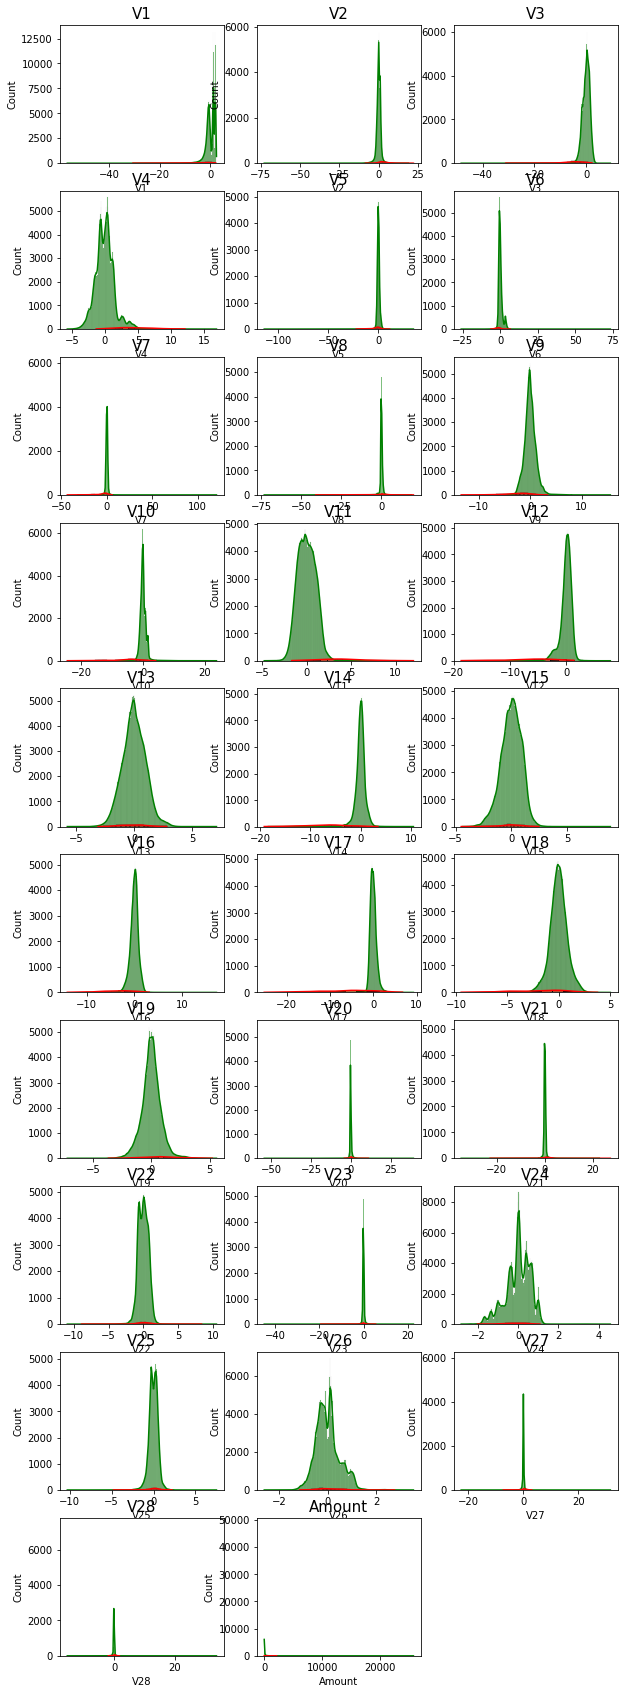

In [26]:
# plotting histograms to see the skewness

plot_hist(X, X_cols)

#### there is skewness present in the data for almost all columns
#### Using Power Transformer from sklearn.preprocessing to make distribution more gaussian like

In [27]:
# splitting and power transforming the data
X_train_pt_sample, X_test_pt_sample, y_train, y_test = preprocess(X, y)

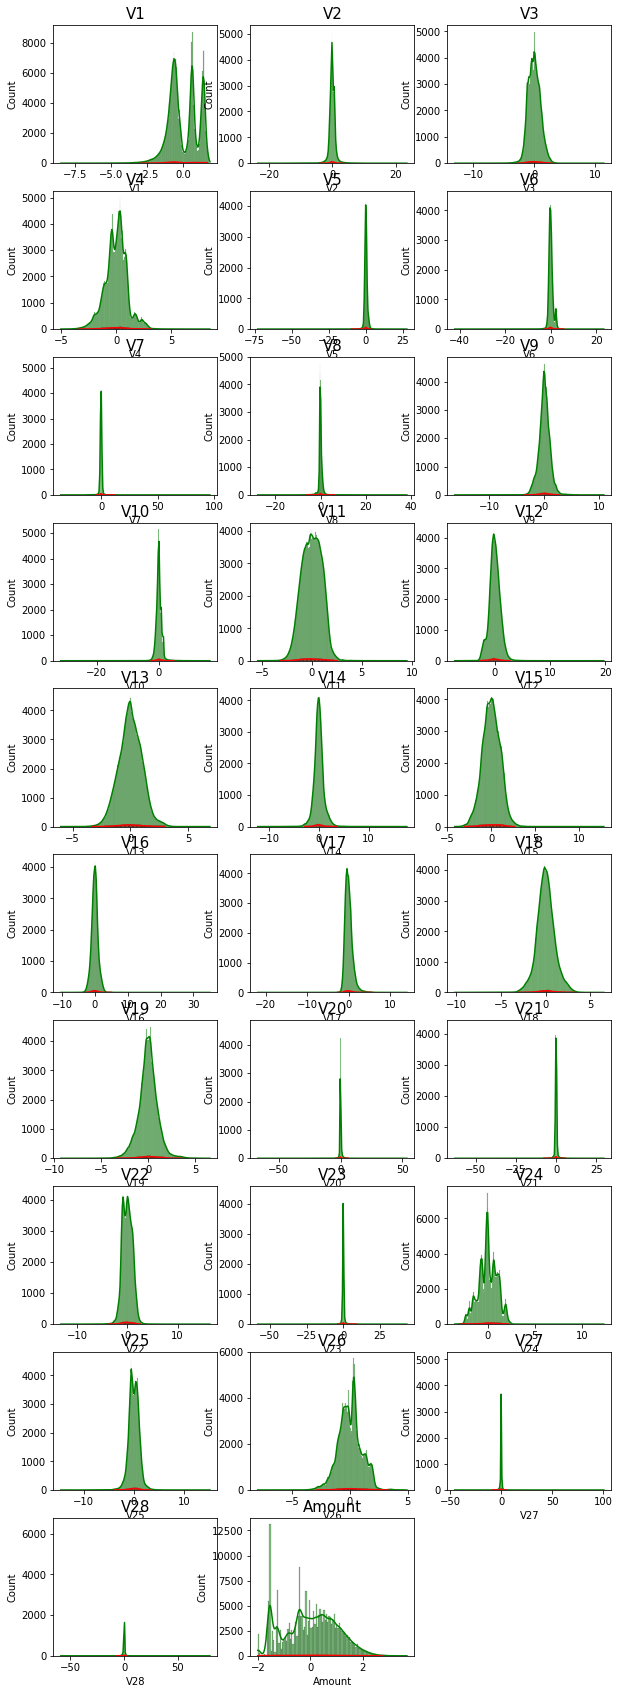

In [28]:
# plotting the histogram of train dataset to see the skewness after power transformation 

plot_hist(X_train_pt_sample, X_cols)

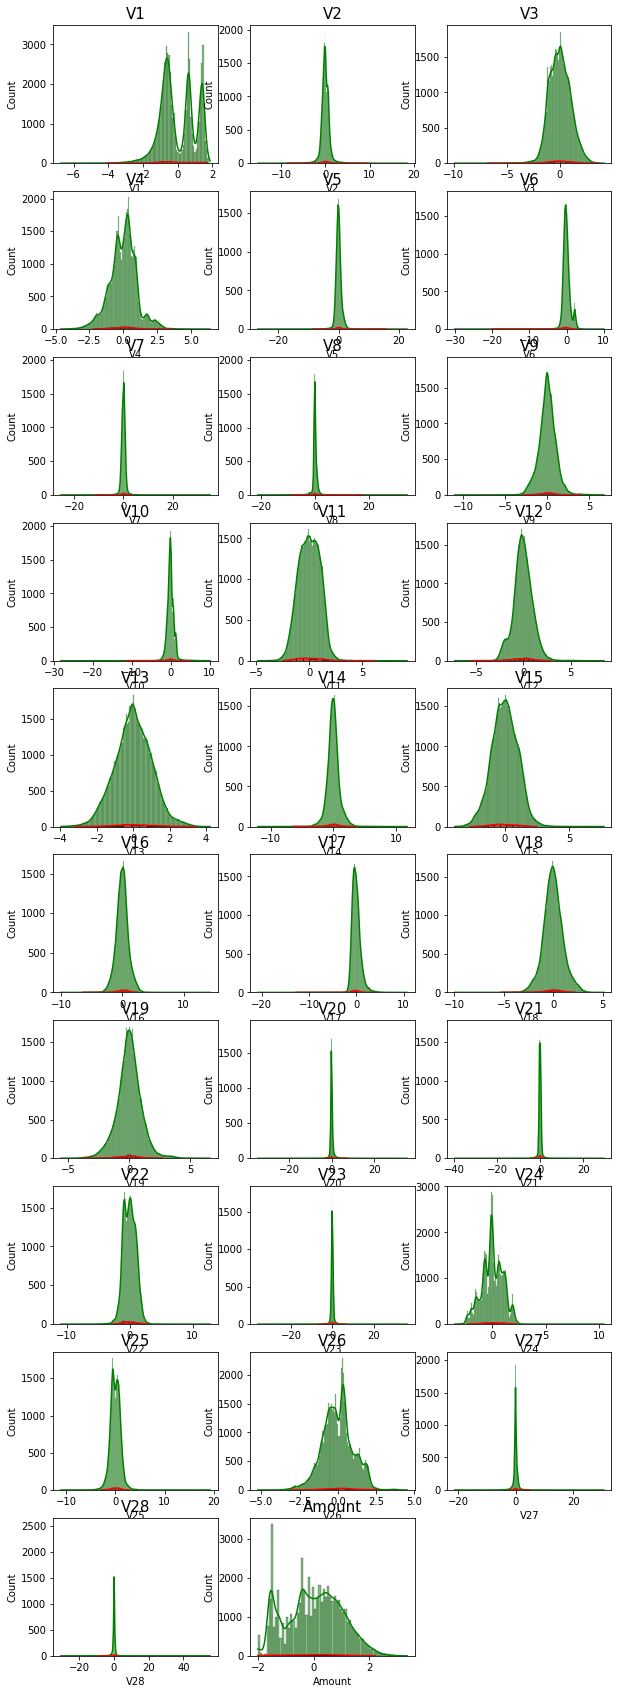

In [29]:
# plotting the histogram of test dataset to see the skewness after power transformation 

plot_hist(X_test_pt_sample, X_cols)

#### After applying power transformation, Skewness is handling accordingly and can be used for model building

## Model building and evaluation

In [30]:
from sklearn.model_selection import GridSearchCV

# using halving grid search to make it computationally faster
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, classification_report

C:\Tools\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Creating some more functions for various models to reuse them in each analysis

In [31]:
# Creating a dataframe to store results

df_results = pd.DataFrame(columns=['Data_Imbalance_Handiling', 'Model', 'Accuracy', 'Precision', 'Recall', 'ROC_value', 'Threshold'])

In [32]:
# function to create and update metric results of the supplied model predictions
def update_metrics(df_results, model_name, data_imbalance, y_test, y_pred, y_pred_probs):
    
    # accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # precision score
    precision = precision_score(y_test, y_pred)
    
    # recall score
    recall = recall_score(y_test, y_pred)
    
    # ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_probs)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    
    # Threshold
    threshold = thresholds[np.argmax(tpr-fpr)]
    
    # updating results in data frame
    df_results = df_results.append(
        pd.DataFrame({
            'Data_Imbalance_Handiling': data_imbalance,
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'roc_value': roc_auc,
            'threshold': threshold
        }, index=[0]),
        ignore_index = True
    )

    print("classification Report: ")
    print(classification_report(y_test, y_pred))

    plt.clf()
    plt.figure(figsize=(15, 5))
    
    # plotting ROC Curve
    plt.subplot(1, 2, 1)
    
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.title('ROC curve - Test data', fontsize=10)
    
    
    # plotting confusion matrix
    plt.subplot(1, 2, 2)
    
    cm = confusion_matrix(y_test, y_pred)
    classNames = ['Non-Fraudalent','Fraudalent']
    tick_marks = np.arange(len(classNames))
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=12)

    plt.show()
    
    return df_results

In [33]:
# function to run the provided model with Halving-GridSearchCV and use the best estimator from the results to perform predictions
def run_model(df_results, model_name, model, data_imbalance, X_train, X_test, y_train, y_test, grid_search_params):
    
    # this will use startified k-Fold if the estimator is a classifier
    grid_search = HalvingGridSearchCV(model, grid_search_params, scoring='roc_auc', n_jobs=-1, cv=5)

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"best parameters for {model_name}: {best_params}")
    
    # predictions
    y_pred = best_model.predict(X_test)
    y_pred_probs = best_model.predict_proba(X_test)[:,1]
    
    # updating metrics
    return update_metrics(df_results, model_name, data_imbalance, y_test, y_pred, y_pred_probs)

In [34]:
# dictionary of the models and the grid search params for each model
models = {
    'Logistic Regression': [
        {
            'penalty': ['l1','l2'],
            'C': [0.001, 0.01, 1, 10, 100, 1000]
        },
        LogisticRegression(random_state=42, max_iter=10000, fit_intercept=True, solver='liblinear', tol=10)
    ],
    # KNN's are computationally expensive
    # 'KNN': [
    #     {
    #         'n_neighbors': list(range(3,10,2)),
    #         'algorithm': ['ball_tree', 'kd_tree', 'brute']
    #     },
    #     KNeighborsClassifier()
    # ],
    'Random Forest': [
        {
            'max_depth': [1, 3, 5, None],
            'min_samples_leaf': [1, 2, 5],
            'n_estimators': [100, 200, 300]
        },
        RandomForestClassifier(bootstrap = True, max_features = 'sqrt', random_state=42)
    ],
    'XGBoost': [
        {
            'max_depth': range(3,10,2),
            'min_child_weight': range(1,6,2),
            'gamma': [i/10.0 for i in range(0,3)]
        },
        XGBClassifier(random_state=42)
    ],
    # Random Forests are better than Decision trees and as the data is already PCA ed, we cannot get any inferrence and so, we can ignore Decision tree models
#     'Decision Tree': [
#         {
#             'criterion': ['gini', 'entropy'],
#             'max_depth': list(range(2,4,1)),
#             'min_smaples_leaf': list(range(5,7,1))
#         },
#         DecisionTreeClassifier(random_state=42)
#     ],
    # SVM use high computations and we can use other models instead of SVM. ALso, we son't need any inferrence on the columns. So ignoring SVM models
#     'SVM': [
#         {
#             'C': [0.5, 0.7, 0.9, 1],
#             'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
#         },
#         SVC(probability=True, random_state=42)
#     ]
}

In [35]:
# function to run the provided models
def run_models(data_imbalance, df_results, X_train, X_test, y_train, y_test):

    for name, values in models.items():
        print(name)
        start_time = time.time()
        df_results = run_model(df_results, name, values[1], data_imbalance, X_train, X_test, y_train, y_test, values[0])
        print(f"Time Taken by {name}: --- {time.time() - start_time} seconds ---")
        print('='*80 )

    return df_results

## Analysis: Without sampling

Logistic Regression
best parameters for Logistic Regression: {'C': 100, 'penalty': 'l1'}
classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.67      0.75        98

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


<Figure size 432x288 with 0 Axes>

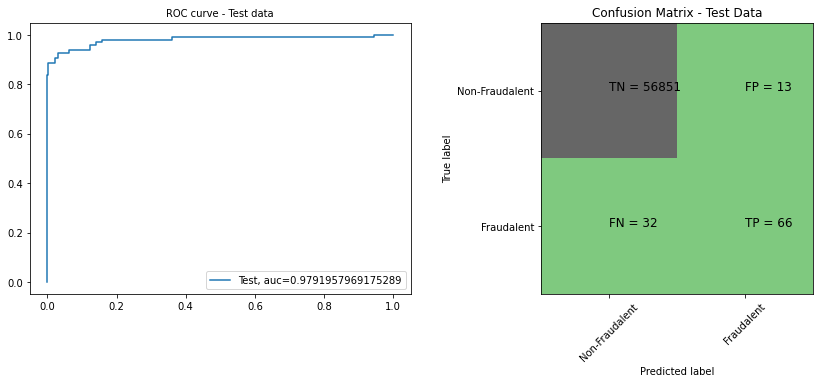

Time Taken by Logistic Regression: --- 15.391590356826782 seconds ---
Random Forest
best parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 200}
classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.74      0.82        98

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


<Figure size 432x288 with 0 Axes>

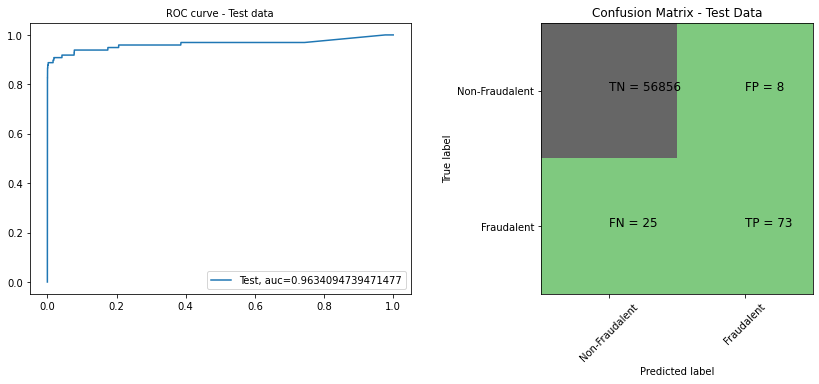

Time Taken by Random Forest: --- 551.1982407569885 seconds ---
XGBoost


C:\Tools\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Tools\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best parameters for XGBoost: {'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1}
classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


<Figure size 432x288 with 0 Axes>

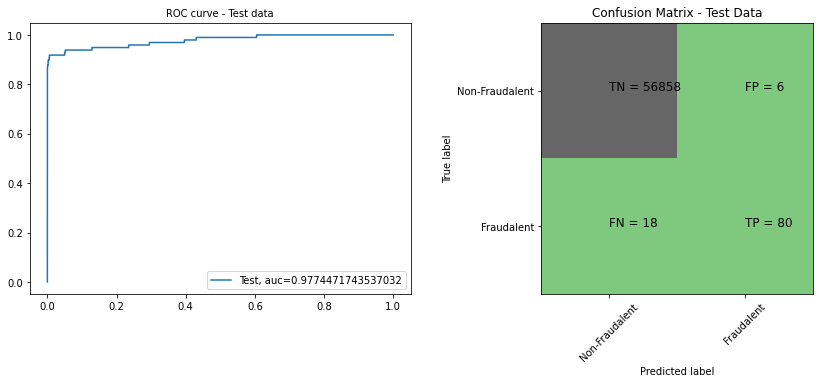

Time Taken by XGBoost: --- 694.0171904563904 seconds ---
Wall time: 21min 15s


,Data_Imbalance_Handiling,Model,Accuracy,Precision,Recall,ROC_value,Threshold,roc_value,threshold
0,Power Transformer,Logistic Regression,0.99921,0.835443,0.673469,NaN,NaN,0.979196,0.003843
1,Power Transformer,Random Forest,0.999421,0.901235,0.744898,NaN,NaN,0.963409,0.000938
2,Power Transformer,XGBoost,0.999579,0.930233,0.816327,NaN,NaN,0.977447,0.000537


In [36]:
%%time

# building and running the models without sampling 
X_train, X_test, y_train, y_test = preprocess(X, y)
df_results = run_models("Power Transformer", df_results, X_train, X_test, y_train, y_test)
df_results

### We can see that the XGBoost model with no Sampling gave the best results with the following parameters:

#### {'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1}


### Let's handle class imbalance using some techniques

Obviously, we cannot use under samping as it will effect the model negatively by removing the data which is important to learn. So, we will be using over-sampling techniques

### Types of oversampling, we will be using:
* Random
* SMOTE
* ADASYN

## Analysis: Under Sampling

In [37]:
from imblearn.under_sampling import RandomUnderSampler

In [38]:
# using random under sampler to smaple majority dataset
under_sampler = RandomUnderSampler(sampling_strategy='majority')

print(y.value_counts())
X_under, y_under = under_sampler.fit_resample(X, y)
print(y_under.value_counts())

0    284315
1       492
Name: Class, dtype: int64
0    492
1    492
Name: Class, dtype: int64


Logistic Regression
best parameters for Logistic Regression: {'C': 1000, 'penalty': 'l1'}
classification Report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        99
           1       0.00      0.00      0.00        98

    accuracy                           0.50       197
   macro avg       0.25      0.50      0.33       197
weighted avg       0.25      0.50      0.34       197



C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

<Figure size 432x288 with 0 Axes>

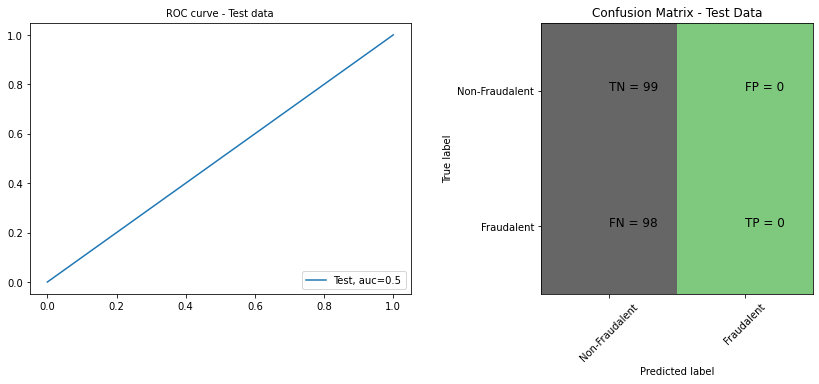

Time Taken by Logistic Regression: --- 1.0699758529663086 seconds ---
Random Forest


C:\Tools\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Tools\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.98888889 0.98888889 0.98888889 0.98888889 0.99444444 0.99166667
 0.98888889 0.99444444 0.98888889 0.98888889 0.98888889 0.98888889]
  warnings.wa

best parameters for Random Forest: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 300}
classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        99
           1       0.99      0.93      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


<Figure size 432x288 with 0 Axes>

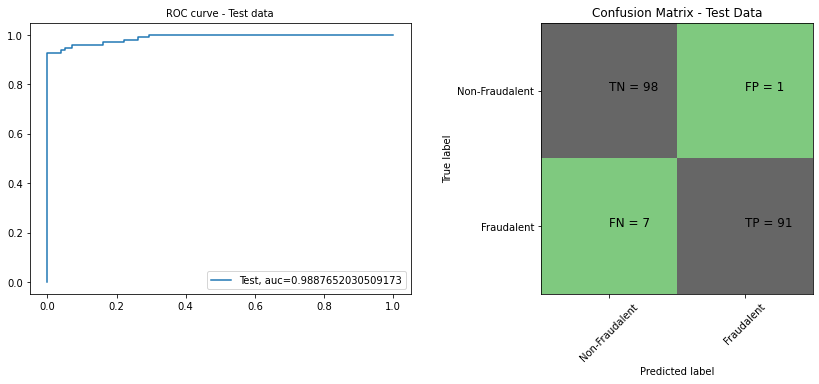

Time Taken by Random Forest: --- 33.5111882686615 seconds ---
XGBoost


C:\Tools\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Tools\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best parameters for XGBoost: {'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1}
classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        99
           1       0.97      0.94      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


<Figure size 432x288 with 0 Axes>

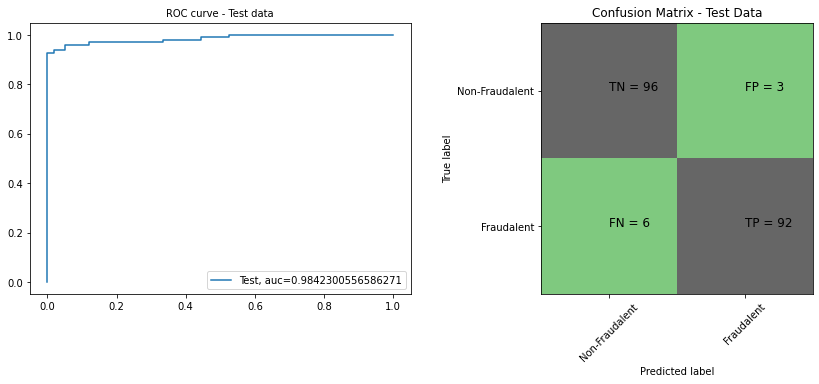

Time Taken by XGBoost: --- 12.922155380249023 seconds ---
Wall time: 47.6 s


,Data_Imbalance_Handiling,Model,Accuracy,Precision,Recall,ROC_value,Threshold,roc_value,threshold
0,Power Transformer,Logistic Regression,0.99921,0.835443,0.673469,NaN,NaN,0.979196,0.003843
1,Power Transformer,Random Forest,0.999421,0.901235,0.744898,NaN,NaN,0.963409,0.000938
2,Power Transformer,XGBoost,0.999579,0.930233,0.816327,NaN,NaN,0.977447,0.000537
3,random under sampling,Logistic Regression,0.502538,0.0,0.0,NaN,NaN,0.500000,1.500000
4,random under sampling,Random Forest,0.959391,0.98913,0.928571,NaN,NaN,0.988765,0.525714
5,random under sampling,XGBoost,0.954315,0.968421,0.938776,NaN,NaN,0.984230,0.929989


In [39]:
%%time

# uilding and running the models on random under sampled data

X_train_under, X_test_under, y_train_under, y_test_under = preprocess(X_under, y_under)
df_results = run_models("random under sampling", df_results, X_train_under, X_test_under, y_train_under, y_test_under)
df_results

## We can see that the Random Forest and XGBoost models with Under Sampling gave best results with the following parameters:

### Random Forest - {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 300}
### XGBoost - {'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1}

## Analysis: Random Over Sampling

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
# using Random over sampler to sample minority class
over_sampler = RandomOverSampler(sampling_strategy='minority')

print(y.value_counts())
X_over, y_over = over_sampler.fit_resample(X, y)
print(y_over.value_counts())

0    284315
1       492
Name: Class, dtype: int64
0    284315
1    284315
Name: Class, dtype: int64


Logistic Regression
best parameters for Logistic Regression: {'C': 1000, 'penalty': 'l1'}


C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


classification Report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56863
           1       0.00      0.00      0.00     56863

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.33    113726



C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

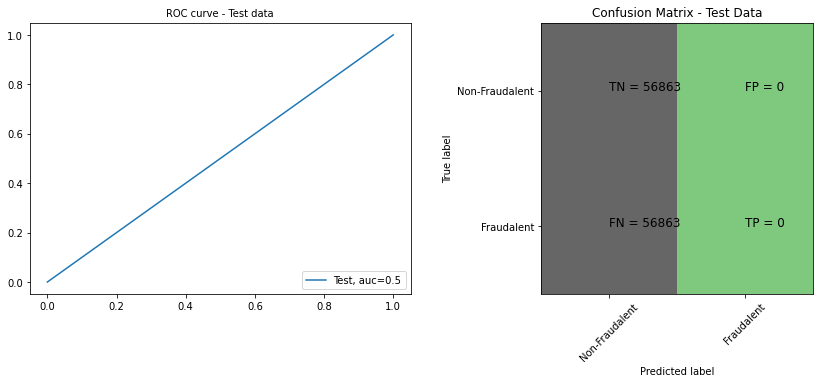

Time Taken by Logistic Regression: --- 14.649020910263062 seconds ---
Random Forest
best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 300}


C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



<Figure size 432x288 with 0 Axes>

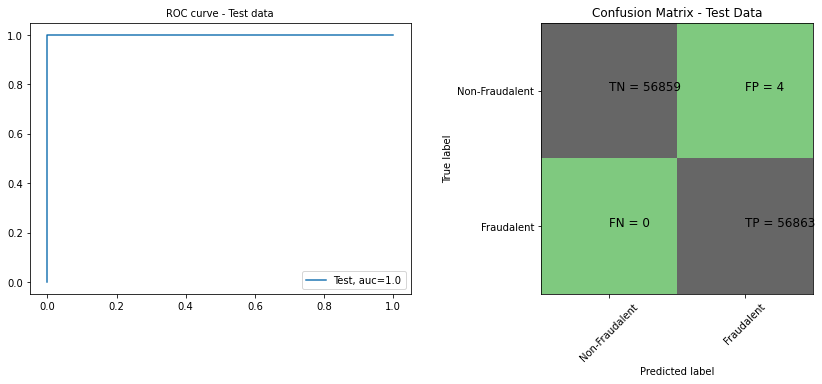

Time Taken by Random Forest: --- 4919.389162302017 seconds ---
XGBoost


C:\Tools\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Tools\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best parameters for XGBoost: {'gamma': 0.1, 'max_depth': 7, 'min_child_weight': 3}


C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



<Figure size 432x288 with 0 Axes>

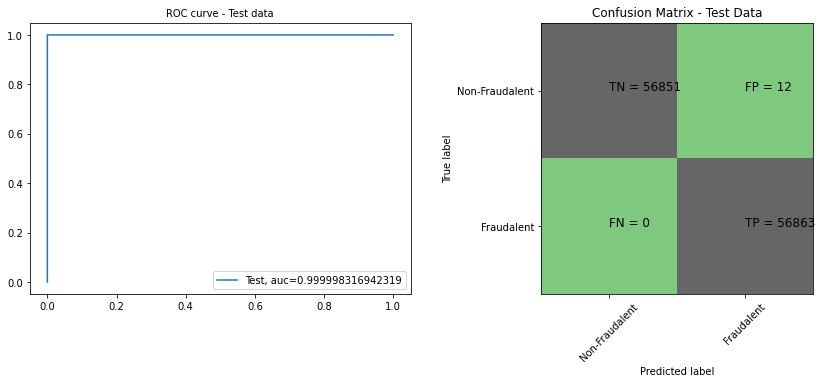

Time Taken by XGBoost: --- 2878.6234838962555 seconds ---
Wall time: 2h 10min 50s


,Data_Imbalance_Handiling,Model,Accuracy,Precision,Recall,ROC_value,Threshold,roc_value,threshold
0,Power Transformer,Logistic Regression,0.99921,0.835443,0.673469,NaN,NaN,0.979196,0.003843
1,Power Transformer,Random Forest,0.999421,0.901235,0.744898,NaN,NaN,0.963409,0.000938
2,Power Transformer,XGBoost,0.999579,0.930233,0.816327,NaN,NaN,0.977447,0.000537
3,random under sampling,Logistic Regression,0.502538,0.0,0.0,NaN,NaN,0.500000,1.500000
4,random under sampling,Random Forest,0.959391,0.98913,0.928571,NaN,NaN,0.988765,0.525714
5,random under sampling,XGBoost,0.954315,0.968421,0.938776,NaN,NaN,0.984230,0.929989
6,random over sampling,Logistic Regression,0.5,0.0,0.0,NaN,NaN,0.500000,1.500000
7,random over sampling,Random Forest,0.999965,0.99993,1.0,NaN,NaN,1.000000,1.000000
8,random over sampling,XGBoost,0.999894,0.999789,1.0,NaN,NaN,0.999998,0.999158


In [42]:
%%time

# building and running the models with random over sampled data sets
X_train_over, X_test_over, y_train_over, y_test_over = preprocess(
    X_over, y_over)
df_results = run_models("random over sampling", df_results,
                        X_train_over, X_test_over, y_train_over, y_test_over)
df_results

## We can see that the Random FOrest and XGBoost models with Random Over Sampling gave best results with the following parameters:

### Random Forest - {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 300}
### XGBoost - {'gamma': 0.1, 'max_depth': 7, 'min_child_weight': 3}

## Analysis: SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
# using SMOTE over sampler to sample minority class
smote_sampler = SMOTE(sampling_strategy='minority')

print(y.value_counts())
X_smote, y_smote = smote_sampler.fit_resample(X, y)
print(y_smote.value_counts())

0    284315
1       492
Name: Class, dtype: int64
0    284315
1    284315
Name: Class, dtype: int64


Logistic Regression
best parameters for Logistic Regression: {'C': 1000, 'penalty': 'l1'}


C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

classification Report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56863
           1       0.00      0.00      0.00     56863

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.33    113726



C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

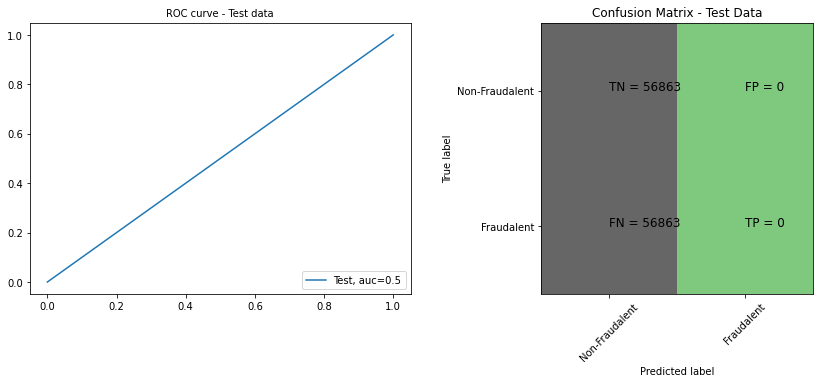

Time Taken by Logistic Regression: --- 25.371516942977905 seconds ---
Random Forest
best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 300}
classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


<Figure size 432x288 with 0 Axes>

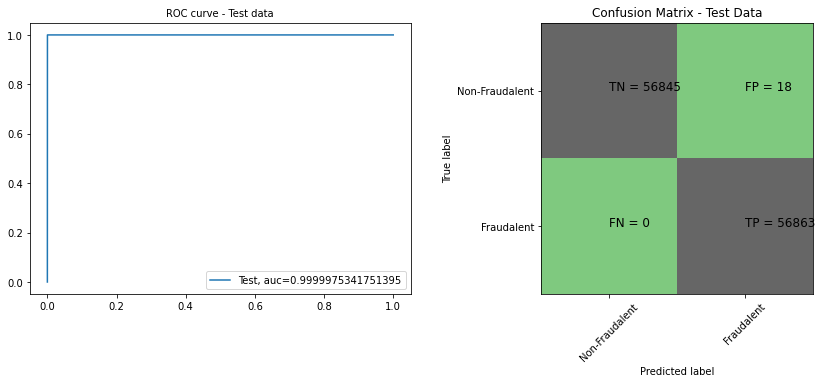

Time Taken by Random Forest: --- 7575.967027664185 seconds ---
XGBoost


C:\Tools\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Tools\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:39:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best parameters for XGBoost: {'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1}
classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


<Figure size 432x288 with 0 Axes>

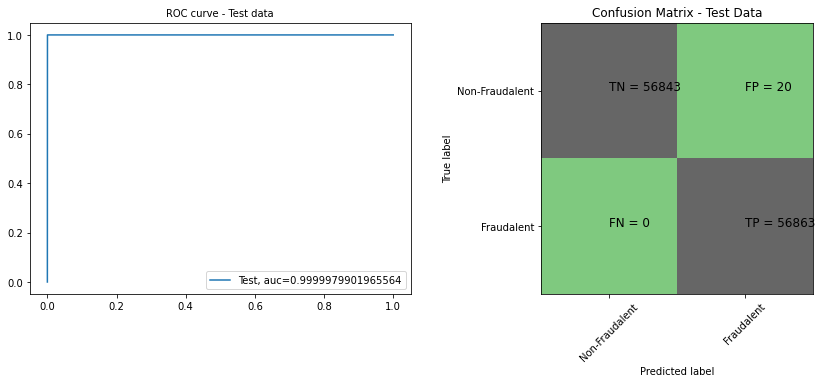

Time Taken by XGBoost: --- 2888.7107191085815 seconds ---
Wall time: 2h 55min 29s


,Data_Imbalance_Handiling,Model,Accuracy,Precision,Recall,ROC_value,Threshold,roc_value,threshold
0,Power Transformer,Logistic Regression,0.99921,0.835443,0.673469,NaN,NaN,0.979196,0.003843
1,Power Transformer,Random Forest,0.999421,0.901235,0.744898,NaN,NaN,0.963409,0.000938
2,Power Transformer,XGBoost,0.999579,0.930233,0.816327,NaN,NaN,0.977447,0.000537
3,random under sampling,Logistic Regression,0.502538,0.0,0.0,NaN,NaN,0.500000,1.500000
4,random under sampling,Random Forest,0.959391,0.98913,0.928571,NaN,NaN,0.988765,0.525714
5,random under sampling,XGBoost,0.954315,0.968421,0.938776,NaN,NaN,0.984230,0.929989
6,random over sampling,Logistic Regression,0.5,0.0,0.0,NaN,NaN,0.500000,1.500000
7,random over sampling,Random Forest,0.999965,0.99993,1.0,NaN,NaN,1.000000,1.000000
8,random over sampling,XGBoost,0.999894,0.999789,1.0,NaN,NaN,0.999998,0.999158
9,SMOTE sampling,Logistic Regression,0.5,0.0,0.0,NaN,NaN,0.500000,1.500000


In [45]:
%%time

# building and running the models with SMOTE over sampled data sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = preprocess(
    X_smote, y_smote)
df_results = run_models("SMOTE sampling", df_results, X_train_smote, X_test_smote, y_train_smote, y_test_smote)
df_results

## We can see that the Random Forest model with SMOTE over Sampling gave best results with the following parameters:

### {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 300}


## Analysis: ADASYN

In [46]:
from imblearn.over_sampling import ADASYN

In [47]:
# using ADASYN over sampler to sample minority class
adasyn_sampler = ADASYN(sampling_strategy='minority')

print(y.value_counts())
X_adasyn, y_adasyn = adasyn_sampler.fit_resample(X, y)
print(y_adasyn.value_counts())

0    284315
1       492
Name: Class, dtype: int64
0    284315
1    284240
Name: Class, dtype: int64


Logistic Regression
best parameters for Logistic Regression: {'C': 1000, 'penalty': 'l1'}
classification Report: 


C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(
C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     56863
           1       0.00      0.00      0.00     56848

    accuracy                           0.50    113711
   macro avg       0.25      0.50      0.33    113711
weighted avg       0.25      0.50      0.33    113711



C:\Tools\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

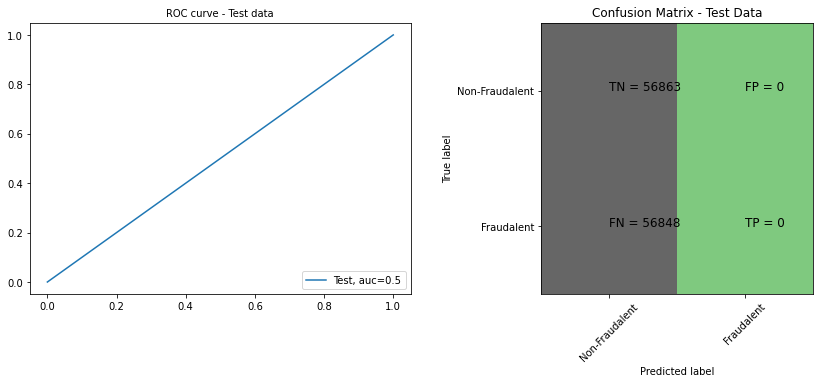

Time Taken by Logistic Regression: --- 13.460293054580688 seconds ---
Random Forest
best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56848

    accuracy                           1.00    113711
   macro avg       1.00      1.00      1.00    113711
weighted avg       1.00      1.00      1.00    113711



C:\Users\pneeruko\AppData\Local\Temp/ipykernel_30656/1305016030.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(


<Figure size 432x288 with 0 Axes>

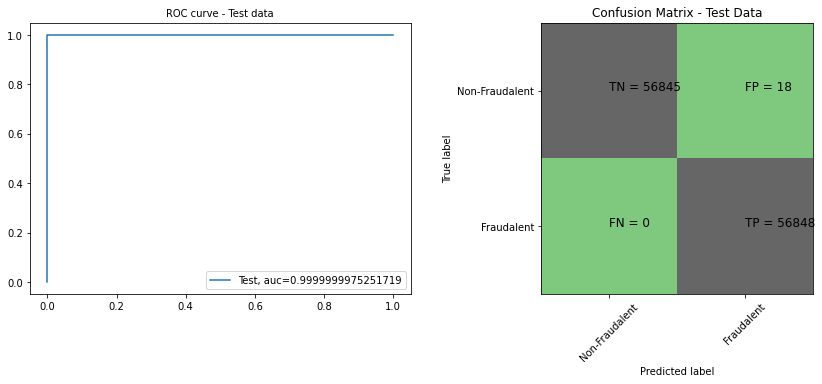

Time Taken by Random Forest: --- 5851.148312330246 seconds ---
XGBoost


KeyboardInterrupt: 

In [48]:
%%time

# building and running the models with ADASYN over sampled data sets
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = preprocess(
    X_adasyn, y_adasyn)
df_results = run_models("ADASYN sampling", df_results,
                        X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn)
df_results

## We can see that the Random Forest model with ADASYN over Sampling gave best results with the following parameters:

### {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}

### Analyzing final results

In [51]:
df_results

,Data_Imbalance_Handiling,Model,Accuracy,Precision,Recall,ROC_value,Threshold,roc_value,threshold
0,Power Transformer,Logistic Regression,0.99921,0.835443,0.673469,NaN,NaN,0.979196,0.003843
1,Power Transformer,Random Forest,0.999421,0.901235,0.744898,NaN,NaN,0.963409,0.000938
2,Power Transformer,XGBoost,0.999579,0.930233,0.816327,NaN,NaN,0.977447,0.000537
3,random under sampling,Logistic Regression,0.502538,0.0,0.0,NaN,NaN,0.500000,1.500000
4,random under sampling,Random Forest,0.959391,0.98913,0.928571,NaN,NaN,0.988765,0.525714
5,random under sampling,XGBoost,0.954315,0.968421,0.938776,NaN,NaN,0.984230,0.929989
6,random over sampling,Logistic Regression,0.5,0.0,0.0,NaN,NaN,0.500000,1.500000
7,random over sampling,Random Forest,0.999965,0.99993,1.0,NaN,NaN,1.000000,1.000000
8,random over sampling,XGBoost,0.999894,0.999789,1.0,NaN,NaN,0.999998,0.999158
9,SMOTE sampling,Logistic Regression,0.5,0.0,0.0,NaN,NaN,0.500000,1.500000


# Final Model selection

#### Based on the above metrics we can go with Random forest with Random Over sampling model with the following parameters as our final model

##### {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 300}


### Building Final model

* Train_test_split: **Stratified Split of Test and Train data sets**
* Minority Data Sampling: **Random Over Sampling**
* Classification Model: **Random Forest Classifier**
* Model Parameters: **bootstrap=True, max_features='sqrt', random_state=42, max_depth= None, min_samples_leaf= 1, n_estimators= 300**

In [53]:
# ADASYN over sampling minority data

from imblearn.over_sampling import RandomOverSampler

final_sampler = RandomOverSampler(sampling_strategy='minority')

X_final, y_final = final_sampler.fit_resample(X, y)

# Pre process data function will split the data sets based on stratify logic and then uses power transformer to handle the skewness of the data
X_train_final, X_test_final, y_train_final, y_test_final = preprocess(X_final, y_final)

In [55]:
# Building final model

final_classifier = RandomForestClassifier(bootstrap=True, max_features='sqrt', random_state=42, max_depth= None, min_samples_leaf= 1, n_estimators= 300)

final_classifier.fit(X_train_final, y_train_final)


RandomForestClassifier(max_features='sqrt', n_estimators=300, random_state=42)

In [56]:
# running predictions on the final model
y_pred_final = final_classifier.predict(X_test_final)
y_pred_probs_final = final_classifier.predict_proba(X_test_final)[:,1]

Accuracy for final model: 0.9999648277438756
Precision for final model: 0.9999296604357536
Recall for final model: 1.0
ROC AUC for our final model: 1.0
Threshold for our final model: 1.0
classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



<Figure size 432x288 with 0 Axes>

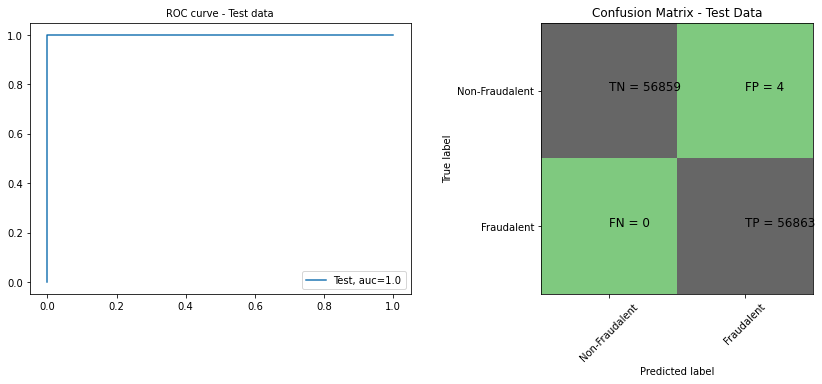

In [57]:
# calculating and printing metrics


# accuracy score
accuracy = accuracy_score(y_test_final, y_pred_final)
print(f"Accuracy for final model: {accuracy}")

# precision score
precision = precision_score(y_test_final, y_pred_final)
print(f"Precision for final model: {precision}")

# recall score
recall = recall_score(y_test_final, y_pred_final)
print(f"Recall for final model: {recall}")

# ROC AUC
roc_auc = roc_auc_score(y_test_final, y_pred_probs_final)
print(f"ROC AUC for our final model: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_probs_final)

# Threshold
threshold = thresholds[np.argmax(tpr-fpr)]
print(f"Threshold for our final model: {threshold}")

print("classification Report: ")
print(classification_report(y_test_final, y_pred_final))

plt.clf()
plt.figure(figsize=(15, 5))

# plotting ROC Curve
plt.subplot(1, 2, 1)

plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
plt.legend(loc=4)
plt.title('ROC curve - Test data', fontsize=10)

# plotting confusion matrix
plt.subplot(1, 2, 2)

cm = confusion_matrix(y_test_final, y_pred_final)
classNames = ['Non-Fraudalent', 'Fraudalent']
tick_marks = np.arange(len(classNames))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=12)

plt.show()


### Final Metrics:

We have selected Random Forest with Random over sampling as our final model and here are the model metrics:

* **Model Accuracy: 99.99%**
* **Precision: 99.99%**
* **Recall: 100%**
* **ROC value: 100%**
* **Threshold:  1.0**
